In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

sns.set()

In [3]:
df = pd.read_csv("../../dataset/data_vivareal_clean.csv")

In [4]:
df.head()

,url,area,rooms,batrooms,garage,value,condominium,bairros,Academia,Aceita_animais,...,Spa,TV_a_cabo,Varanda,Varanda_fechada_com_vidro,Varanda_gourmet,Vigia,Vista_exterior,Vista_panoramica,Vista_para_o_mar,unknown
0,https://www.vivareal.com.br/imovel/apartamento...,51,2,1,1,325000.0,350.0,Agua_Verde,0,1,...,0,0,0,0,0,0,0,0,0,0
1,https://www.vivareal.com.br/imoveis-lancamento...,72,3,2,2,598000.0,0.0,Vila_Izabel,0,0,...,0,0,0,0,0,0,0,0,0,1
2,https://www.vivareal.com.br/imovel/apartamento...,94,3,2,2,680000.0,530.0,Agua_Verde,0,1,...,0,0,0,0,0,0,0,0,0,0
3,https://www.vivareal.com.br/imovel/apartamento...,54,2,1,0,215000.0,345.0,Agua_Verde,0,1,...,0,0,0,0,0,0,0,0,0,0
4,https://www.vivareal.com.br/imovel/apartamento...,102,3,3,2,650000.0,1000.0,Agua_Verde,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
url = df["url"]

In [6]:
df.iloc[:, df.columns != "url"]

,area,rooms,batrooms,garage,value,condominium,bairros,Academia,Aceita_animais,Acesso_para_deficientes,...,Spa,TV_a_cabo,Varanda,Varanda_fechada_com_vidro,Varanda_gourmet,Vigia,Vista_exterior,Vista_panoramica,Vista_para_o_mar,unknown
0,51,2,1,1,325000.0,350.0,Agua_Verde,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,72,3,2,2,598000.0,0.0,Vila_Izabel,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,94,3,2,2,680000.0,530.0,Agua_Verde,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,54,2,1,0,215000.0,345.0,Agua_Verde,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,102,3,3,2,650000.0,1000.0,Agua_Verde,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30637,67,3,2,1,275000.0,517.0,Xaxim,0,0,0,...,0,0,1,0,0,0,0,0,0,0
30638,167,3,2,2,798000.0,0.0,Xaxim,0,0,0,...,0,0,1,0,0,0,0,0,0,0
30639,67,3,2,1,290000.0,289.0,Xaxim,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30640,52,2,1,1,205000.0,250.0,Xaxim,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Outliers

In [7]:
features = ["area", "rooms", "batrooms", "garage", "value", "condominium", "bairros"] 
df_small = df.loc[:,features]

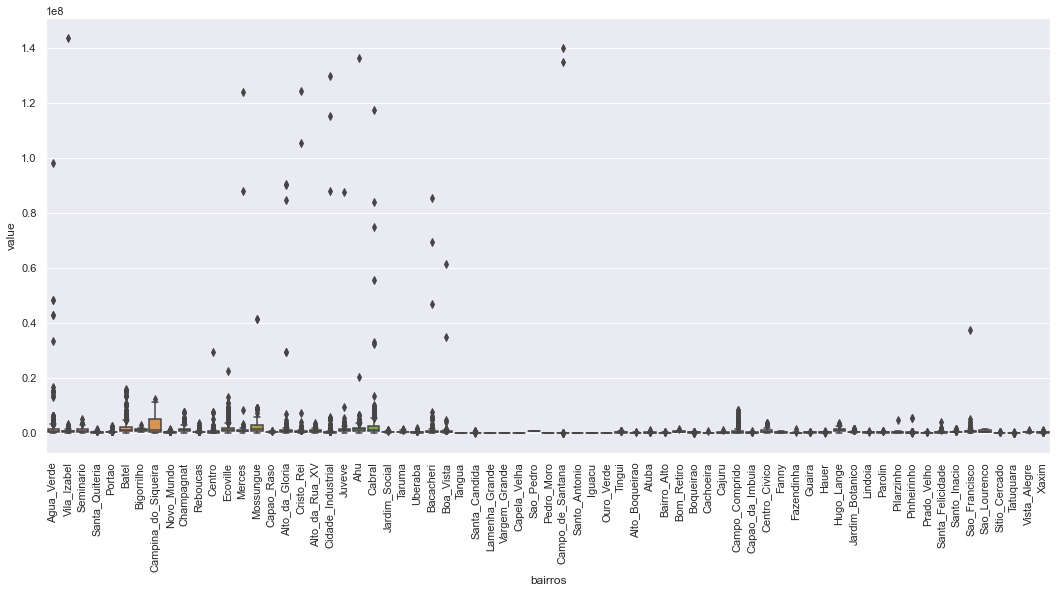

In [8]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df_small, x="bairros", y="value")
plt.xticks(rotation=90)
plt.show()

In [9]:
def calculate_quantiles(df, bairro, feature, p1, p3):
    q1 = df.loc[df["bairros"] == bairro, feature].quantile(p1)
    q3 = df.loc[df["bairros"] == bairro, feature].quantile(p3)
    
    iqr = q3 - q1
    
    r1 = max(q1 - (1.5*iqr), 0)
    r2 = q3 + (1.5*iqr)    
    
    return (r1, r2)

def calculate_percentil(df, bairro, feature, p1, p3):
    q1, q3 = df.loc[df["bairros"] == bairro, feature].quantile([p1, p3])
    return [q1, q3]

In [10]:
df.loc[df["bairros"] == "Centro", "area"].quantile([0.25, 0.75])

0.25    33.0
0.75    96.0
Name: area, dtype: float64

In [11]:
def remove_outliers(df, bairro, feature, r1, r2):
    r = calculate_quantiles(df, bairro, feature, 0.25, 0.75)
    perc = calculate_percentil(df, bairro, feature, r1, r2)
    
    len_before = sum(~df.loc[df["bairros"] == bairro, feature].isnull())
    len_after = sum(~df.loc[(df["bairros"] == bairro) & (df[feature].between(r[0], r[1])), feature].isnull())
    
    len_after_perc = sum(~df.loc[(df["bairros"] == bairro) & (df[feature].between(perc[0], perc[1])), feature].isnull())
    
    removed = 1 - (len_after / len_before)
    removed_perc = 1 - (len_after_perc / len_before)
    
    if removed > removed_perc:
        print("Removing Using Percentils!")

        print(f"p1: {perc[0]} - p2: {perc[1]}.")
        print(f"Will be removed: {removed_perc}%.")
        df.loc[(df["bairros"] == bairro) & (~df[feature].between(perc[0], perc[1])), feature] = np.nan
        
        len_after_perc = sum(~df.loc[df["bairros"] == bairro, feature].isnull())
        
        print(f"Len Before: {len_before} - Len After: {len_after_perc}")
        print(f"Removed: {1 - (len_after_perc / len_before)}%")
        
    else:
        print("Removing Using Quantile!")
        print(f"r1: {r[0]} - r2: {r[1]}.")
        print(f"Will be removed: {removed}%.")
        df.loc[(df["bairros"] == bairro) & (~df[feature].between(r[0], r[1])), feature] = np.nan
        print(f"Len Before: {len_before} - Len After: {len_after}")
        print(f"Removed: {1 - (len_after / len_before)}%")
        
    print()
    

In [12]:
bairros = df["bairros"].unique()

In [13]:
for bairro in bairros:
    print(bairro)
    remove_outliers(df, bairro, "area", 0.25, 0.75)

Agua_Verde
Removing Using Quantile!
r1: 0 - r2: 286.0.
Will be removed: 0.045584953777494386%.
Len Before: 3137 - Len After: 2994
Removed: 0.045584953777494386%

Vila_Izabel
Removing Using Quantile!
r1: 14.0 - r2: 166.0.
Will be removed: 0.0769961977186312%.
Len Before: 1052 - Len After: 971
Removed: 0.0769961977186312%

Seminario
Removing Using Quantile!
r1: 0 - r2: 233.0.
Will be removed: 0.051162790697674376%.
Len Before: 215 - Len After: 204
Removed: 0.051162790697674376%

Santa_Quiteria
Removing Using Quantile!
r1: 19.875 - r2: 94.875.
Will be removed: 0.11344537815126055%.
Len Before: 238 - Len After: 211
Removed: 0.11344537815126055%

Portao
Removing Using Quantile!
r1: 0 - r2: 136.5.
Will be removed: 0.040100250626566414%.
Len Before: 1197 - Len After: 1149
Removed: 0.040100250626566414%

Batel
Removing Using Quantile!
r1: 0 - r2: 498.5.
Will be removed: 0.04380341880341876%.
Len Before: 1872 - Len After: 1790
Removed: 0.04380341880341876%

Bigorrilho
Removing Using Quantile!
r

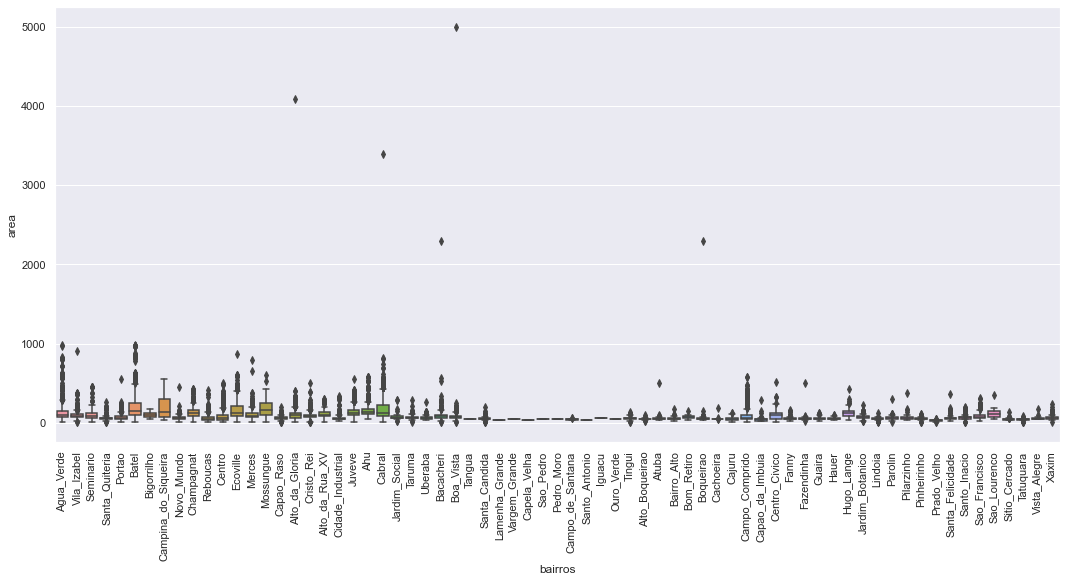

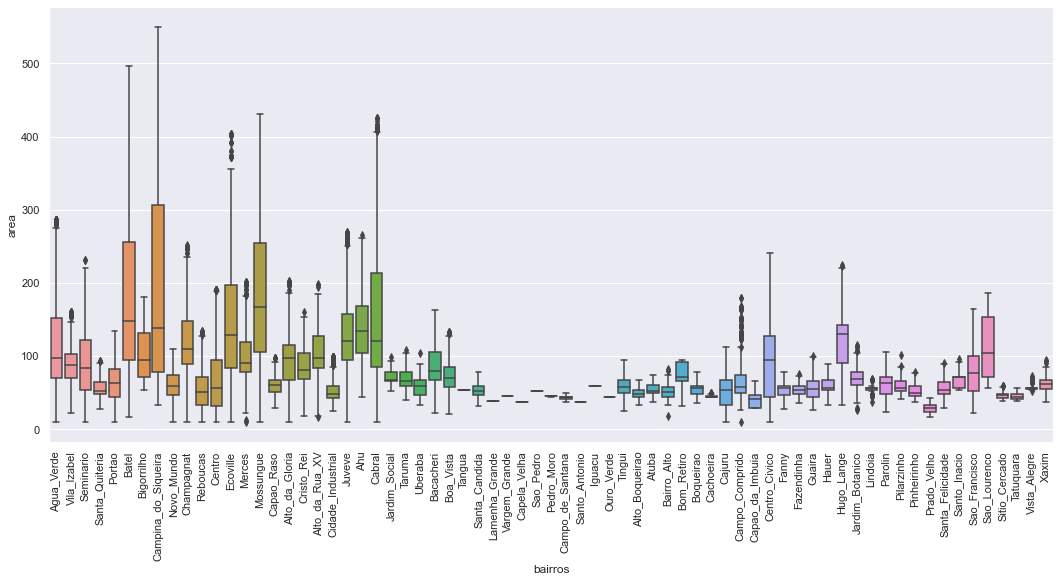

In [14]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df_small, x="bairros", y="area")
plt.xticks(rotation=90)

plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="bairros", y="area")
plt.xticks(rotation=90)
plt.show()

In [15]:
for bairro in bairros:
    remove_outliers(df, bairro, "condominium", 0.25, 0.75)


Removing Using Quantile!
r1: 0 - r2: 1482.5.
Will be removed: 0.052598023589416676%.
Len Before: 3137 - Len After: 2972
Removed: 0.052598023589416676%

Removing Using Quantile!
r1: 0 - r2: 1298.125.
Will be removed: 0.019011406844106515%.
Len Before: 1052 - Len After: 1032
Removed: 0.019011406844106515%

Removing Using Quantile!
r1: 0 - r2: 1297.5.
Will be removed: 0.06511627906976747%.
Len Before: 215 - Len After: 201
Removed: 0.06511627906976747%

Removing Using Quantile!
r1: 0 - r2: 893.75.
Will be removed: 0.0%.
Len Before: 238 - Len After: 238
Removed: 0.0%

Removing Using Quantile!
r1: 0 - r2: 1125.0.
Will be removed: 0.006683375104427736%.
Len Before: 1197 - Len After: 1189
Removed: 0.006683375104427736%

Removing Using Quantile!
r1: 0 - r2: 3000.0.
Will be removed: 0.05074786324786329%.
Len Before: 1872 - Len After: 1777
Removed: 0.05074786324786329%

Removing Using Quantile!
r1: 0.0 - r2: 0.0.
Will be removed: 0.0%.
Len Before: 10 - Len After: 10
Removed: 0.0%

Removing Using 

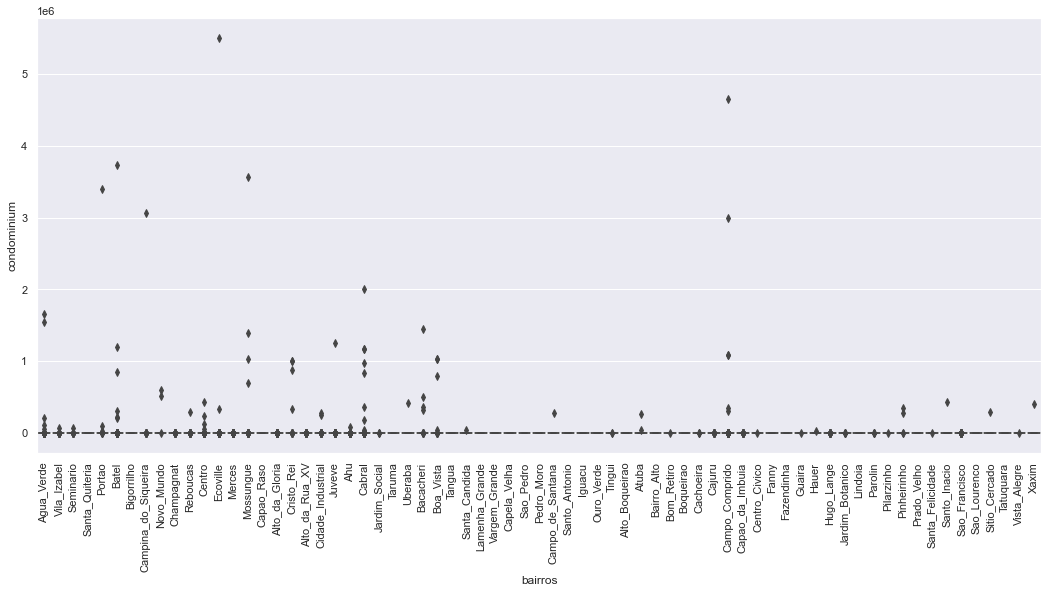

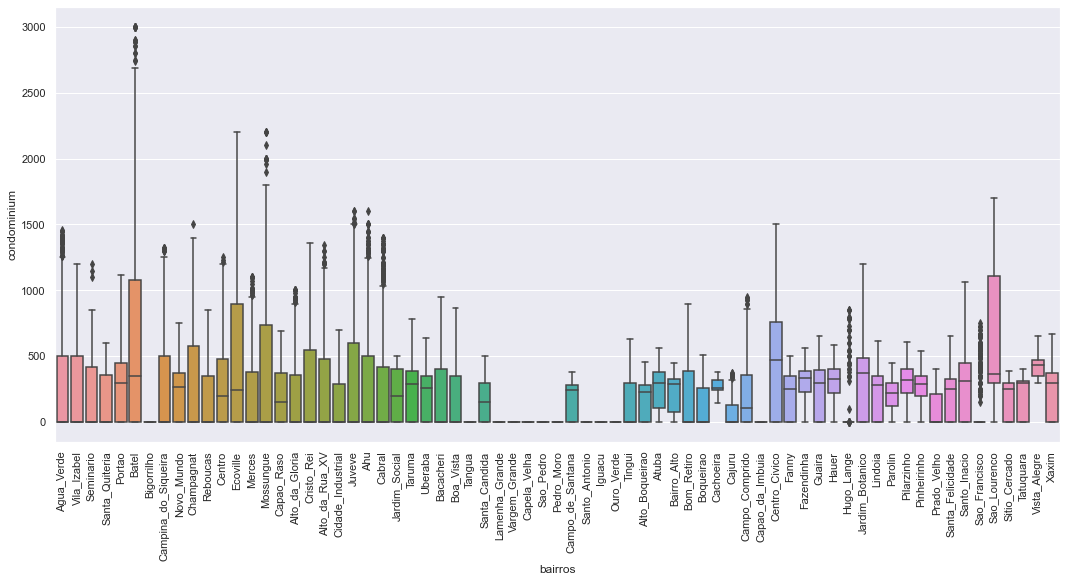

In [16]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df_small, x="bairros", y="condominium")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="bairros", y="condominium")
plt.xticks(rotation=90)
plt.show()

In [17]:
for bairro in bairros:
    remove_outliers(df, bairro, "value", 0.25, 0.75)

Removing Using Quantile!
r1: 0 - r2: 3325000.0.
Will be removed: 0.05355435129104236%.
Len Before: 3137 - Len After: 2969
Removed: 0.05355435129104236%

Removing Using Quantile!
r1: 0 - r2: 1607823.5.
Will be removed: 0.05893536121673004%.
Len Before: 1052 - Len After: 990
Removed: 0.05893536121673004%

Removing Using Quantile!
r1: 0 - r2: 2953840.0.
Will be removed: 0.018604651162790753%.
Len Before: 215 - Len After: 211
Removed: 0.018604651162790753%

Removing Using Quantile!
r1: 0 - r2: 803500.0.
Will be removed: 0.04201680672268904%.
Len Before: 238 - Len After: 228
Removed: 0.04201680672268904%

Removing Using Quantile!
r1: 0 - r2: 859000.0.
Will be removed: 0.06599832915622394%.
Len Before: 1197 - Len After: 1118
Removed: 0.06599832915622394%

Removing Using Quantile!
r1: 0 - r2: 4835421.75.
Will be removed: 0.08760683760683763%.
Len Before: 1872 - Len After: 1708
Removed: 0.08760683760683763%

Removing Using Quantile!
r1: 0 - r2: 2416397.25.
Will be removed: 0.09999999999999998%

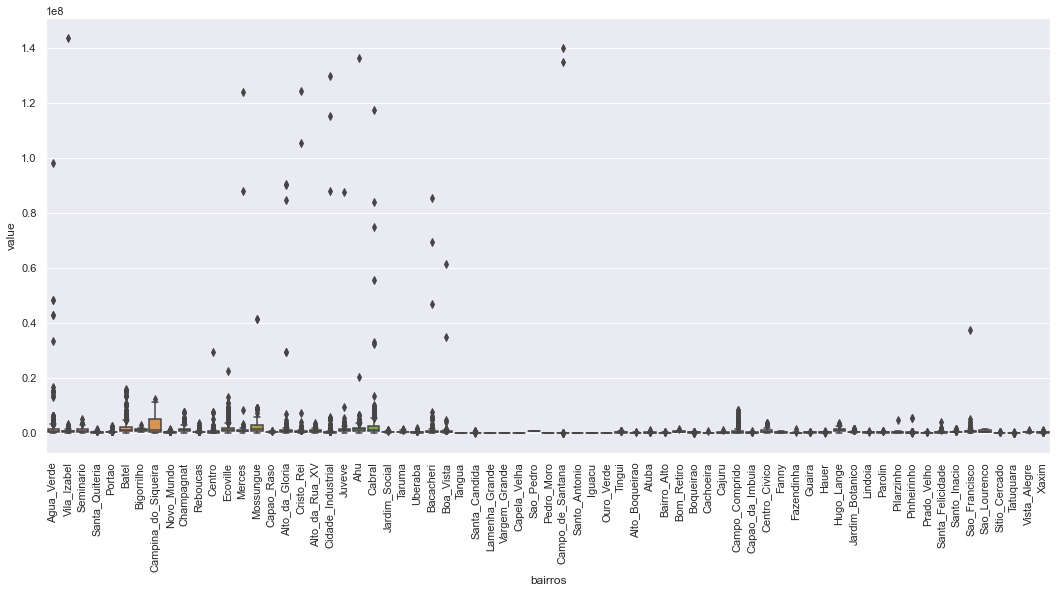

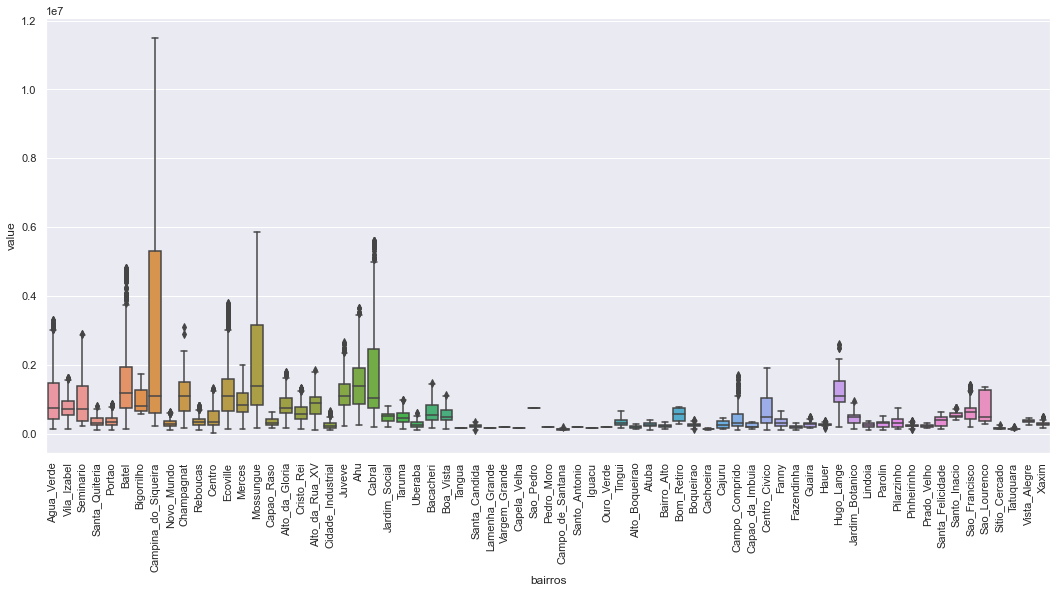

In [18]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df_small, x="bairros", y="value")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="bairros", y="value")
plt.xticks(rotation=90)
plt.show()

# Analise discrete values

## Rooms

In [19]:
df["rooms"].value_counts(normalize=True)

3     0.457640
2     0.327165
1     0.130409
4     0.081196
5     0.003133
6     0.000326
20    0.000065
19    0.000033
12    0.000033
Name: rooms, dtype: float64

In [20]:
df.loc[df["rooms"] > 6, "rooms"] = np.nan

 ## Bathrooms

In [21]:
df["batrooms"].value_counts(normalize=True)

2     0.335096
1     0.324032
3     0.153384
4     0.084525
5     0.069806
6     0.023269
7     0.004504
8     0.002937
9     0.000881
10    0.000881
11    0.000522
16    0.000098
20    0.000065
Name: batrooms, dtype: float64

In [22]:
df.loc[df["batrooms"] > 8, "batrooms"] = np.nan

In [23]:
df["batrooms"].value_counts(normalize=True)

2.0    0.335918
1.0    0.324827
3.0    0.153761
4.0    0.084732
5.0    0.069977
6.0    0.023326
7.0    0.004515
8.0    0.002944
Name: batrooms, dtype: float64

## Garage

In [24]:
df["garage"].value_counts(normalize=True)

1     0.437961
2     0.273481
0     0.151524
3     0.084068
4     0.043698
5     0.007017
6     0.001469
10    0.000163
8     0.000098
7     0.000098
52    0.000065
9     0.000065
12    0.000033
40    0.000033
11    0.000033
14    0.000033
80    0.000033
30    0.000033
18    0.000033
16    0.000033
36    0.000033
Name: garage, dtype: float64

In [25]:
df.loc[df["garage"] > 5, "garage"] = np.nan

In [26]:
total_size_before = df.shape[0]
total_size_after = df.dropna().isna().shape
total_removed = (1 - (total_size_after[0] / total_size_before)) * 100

In [27]:
print(f"Size before: {total_size_before}")
print(f"Size after: {total_size_after[0]}")
print(f"Amount removed: {total_removed:.2f}%")

Size before: 30642
Size after: 27435
Amount removed: 10.47%


# Plots

<AxesSubplot:xlabel='area', ylabel='value'>

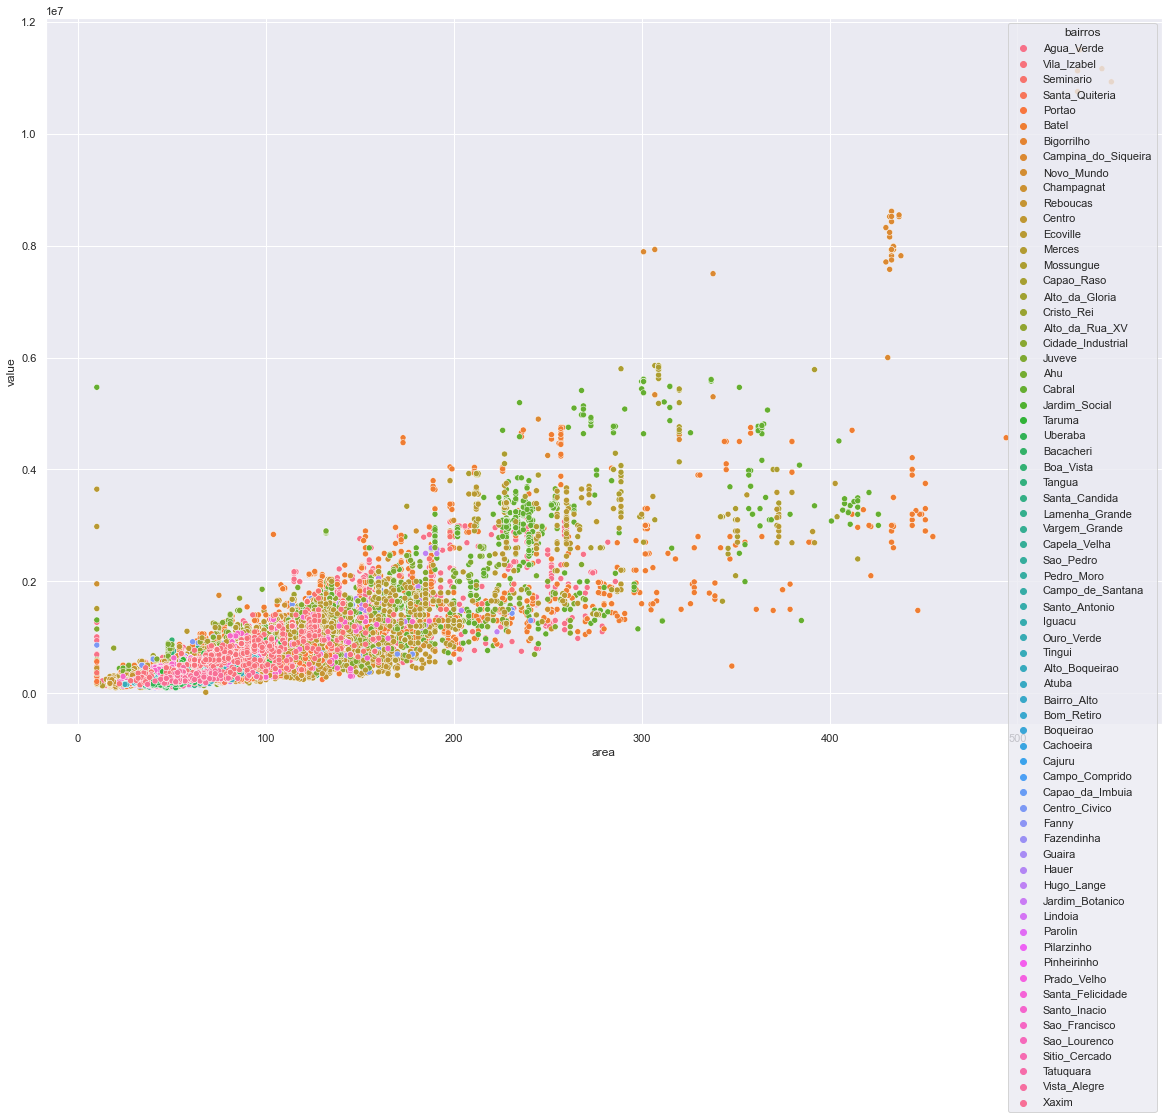

In [28]:
plt.figure(figsize=(20,13))
sns.scatterplot(data=df, x="area", y="value", hue="bairros")

## Populate Null features

In [46]:
df.loc[:,df.isnull().sum() > 0].columns

Index(['area', 'rooms', 'batrooms', 'garage', 'value', 'condominium'], dtype='object')

## Area

In [61]:
df["area"].isnull().sum()

1632

In [88]:
pd.qcut(df["value"], 6).unique()

[(249900.0, 360000.0], (549000.0, 799000.0], (16131.999, 249900.0], (799000.0, 1250000.0], (1250000.0, 11500000.0], NaN, (360000.0, 549000.0]]
Categories (6, interval[float64, right]): [(16131.999, 249900.0] < (249900.0, 360000.0] < (360000.0, 549000.0] < (549000.0, 799000.0] < (799000.0, 1250000.0] < (1250000.0, 11500000.0]]

In [ ]:
# 16131.999, 299900.0  - 0
# 299900.0, 549000.0   - 1
# 549000.0, 987000.0  - 2
# 987000.0, 11500000.0 - 3

In [84]:
df_temp = df

In [86]:
df_temp.loc[(df_temp["value"] > 16131) & (df_temp["value"] < 299900), "cat_value"] = 0
df_temp.loc[(df_temp["value"] >= 299900) & (df_temp["value"] < 549000), "cat_value"] = 1
df_temp.loc[(df_temp["value"] >= 549000) & (df_temp["value"] < 987000), "cat_value"] = 2
df_temp.loc[(df_temp["value"] > 987000), "cat_value"] = 3

In [95]:
area_mean = df_temp.groupby("cat_value").mean()["area"]


45.1726507713885

In [99]:
df.loc[df["area"].isnull() & (df["cat_value"] == 0), "area"] = area_mean[0]
df.loc[df["area"].isnull() & (df["cat_value"] == 1), "area"] = area_mean[1]
df.loc[df["area"].isnull() & (df["cat_value"] == 2), "area"] = area_mean[2]
df.loc[df["area"].isnull() & (df["cat_value"] == 3), "area"] = area_mean[3]